In [6]:
# Imports
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append('../src')
from preprocessing import load_dataset, preprocess_images, split_data

from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [7]:
#Define Constants
#DATA_DIR = '../data/raw/RealSign_Dataset'
#IMG_SIZE = 64  # Resize all images to 64x64 for consistency

#Load Dataset with Timing
DATA_DIR = '../data/raw/RealSign_Dataset'
X, y, class_names, class_times, class_counts = load_dataset(DATA_DIR)

print(f" Loaded {len(X)} images from {len(class_names)} classes.")

Loading Z: 100%|██████████| 1200/1200 [00:40<00:00, 29.93it/s]


 Loaded 42000 images from 35 classes.


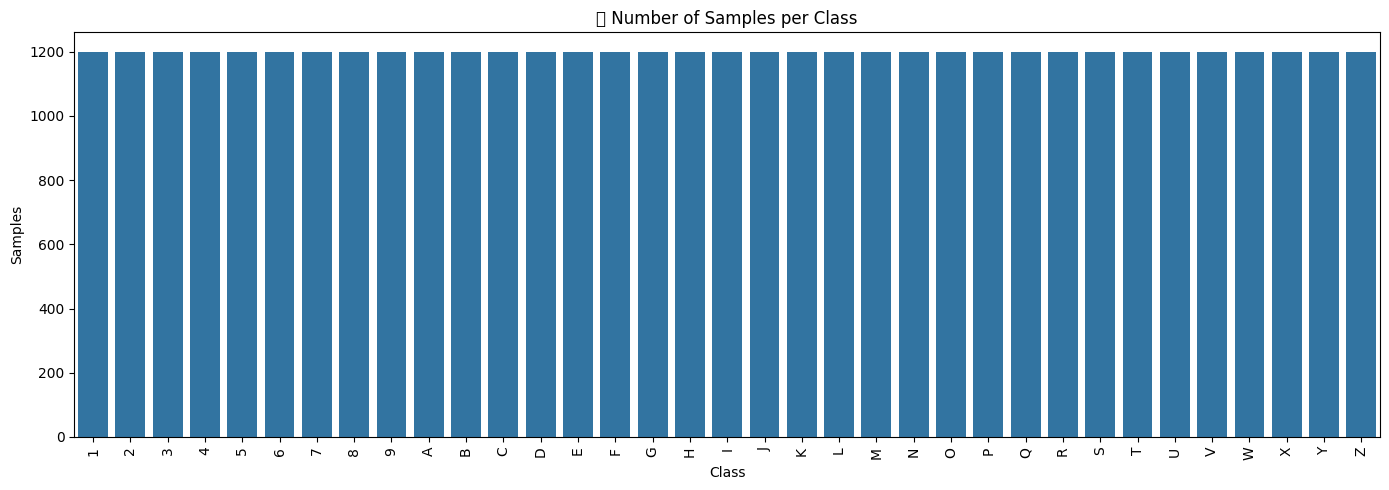

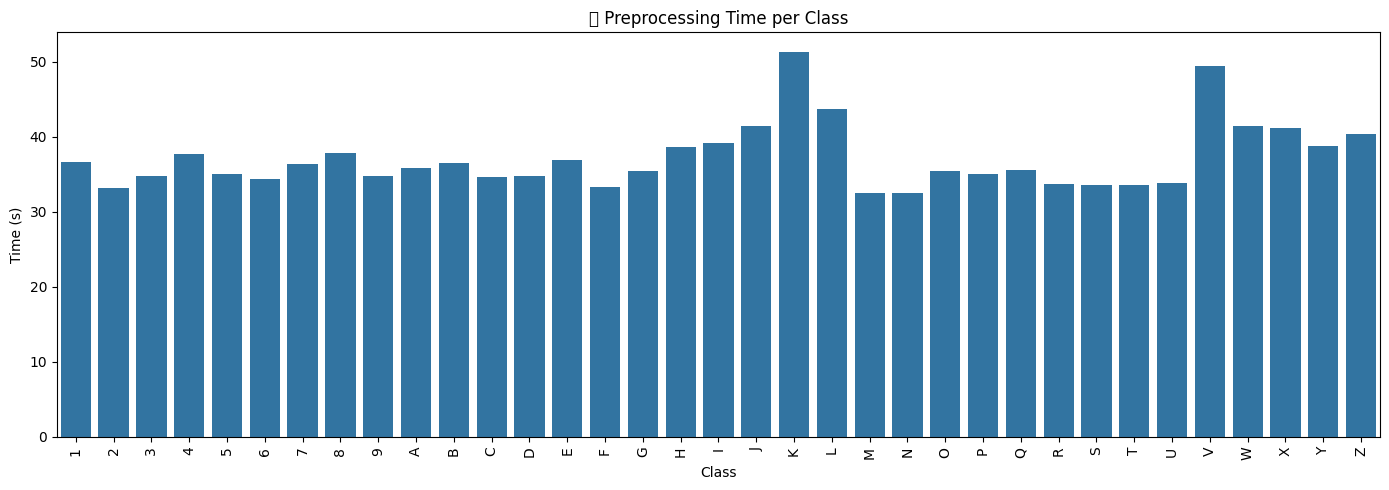

In [8]:
stats_df = pd.DataFrame({
    "Class": list(class_counts.keys()),
    "Samples": list(class_counts.values()),
    "Time (s)": list(class_times.values())
})

# Sample counts
plt.figure(figsize=(14, 5))
sns.barplot(x="Class", y="Samples", data=stats_df)
plt.xticks(rotation=90)
plt.title("📊 Number of Samples per Class")
plt.tight_layout()
plt.show()

# Preprocessing time
plt.figure(figsize=(14, 5))
sns.barplot(x="Class", y="Time (s)", data=stats_df)
plt.xticks(rotation=90)
plt.title("⏱️ Preprocessing Time per Class")
plt.tight_layout()
plt.show()


In [10]:
# Preprocess Images & Labels

X, y_cat, le = preprocess_images(X, y)

print(" Images normalized and labels one-hot encoded.")
print("Classes:", le.classes_)


 Images normalized and labels one-hot encoded.
Classes: ['1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I'
 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [11]:
# Normalize Images
#X = X.astype('float32') / 255.0  # normalize to [0,1]

#print(" Normalized image pixel values to [0,1].")

In [12]:
#Split into Train, Validation, Test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y_cat)

print(f" Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


 Train: 29400, Val: 6300, Test: 6300


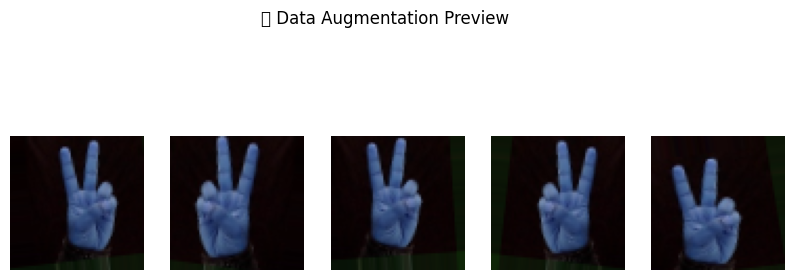

In [13]:
# Augmentation Preview

aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

sample = X_train[0].reshape(1, 64, 64, 3)

plt.figure(figsize=(10, 4))
for i in range(5):
    aug_img = next(aug.flow(sample, batch_size=1))[0]
    plt.subplot(1, 5, i+1)
    plt.imshow(aug_img)
    plt.axis('off')

plt.suptitle("🔁 Data Augmentation Preview")
plt.show()


In [14]:
# Save stats to CSV (interview-worthy!)
os.makedirs('../logs', exist_ok=True)
stats_df.to_csv('../logs/class_stats.csv', index=False)
print(" Class stats saved to logs/class_stats.csv")

 Class stats saved to logs/class_stats.csv


In [15]:
# Save stats to CSV
os.makedirs('../logs', exist_ok=True)
stats_df.to_csv('../logs/class_stats.csv', index=False)
print(" Stats saved to: logs/class_stats.csv")

# Save Preprocessed Data (Good for reuse)
os.makedirs('../data/processed', exist_ok=True)
np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/X_val.npy', X_val)
np.save('../data/processed/y_val.npy', y_val)
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/y_test.npy', y_test)
print("✅ All preprocessed data saved to data/processed/")

 Stats saved to: logs/class_stats.csv
✅ All preprocessed data saved to data/processed/
